In [185]:
from PIL import Image
import matplotlib.pyplot as plt

In [43]:
import pandas as pd
import numpy as np

import requests
from sklearn.metrics.pairwise import cosine_similarity

In [151]:
class RecipeRecommendByCousineSimilarity:
    def __init__(self, df_recipes, recipes_features):
        self._df_recipes = df_recipes
        self._recipes_features = recipes_features
        self._cosine_similarities = cosine_similarity(recipes_features, recipes_features)

    def recommend(self, row_id):
        max_el = None
        max_dist = None
        
        for i in range(self._cosine_similarities.shape[1]):
            if i == row_id or self._cosine_similarities[row_id][i] >= 1:
                continue

            if max_dist is None:
                max_dist = self._cosine_similarities[row_id][i]
                
            elif self._cosine_similarities[row_id][i] > max_dist:
                max_dist = self._cosine_similarities[row_id][i]
                max_el = i
        
        return self._df_recipes.iloc[max_el]


In [152]:
df_recipes = pd.read_csv('recipes_vkusno.csv', sep='\t')
features = pd.read_csv('recipes_features_vkusno.csv', sep='\t')

In [153]:
rs = RecipeRecommendByCousineSimilarity(df_recipes, features)

In [175]:
def pretty_view_recipe(df_series):
    for name, value in zip(df_series.index, df_series.values):
        if name == 'image_url':
            im = Image.open(requests.get('http:' + value, stream=True).raw)
            plt.imshow(im)
            continue
            
        print(name)
        print(value, '\n')

In [189]:
row_id = 14

name
Куриные ножки в горчично-медовом маринаде в духовке 

cuisine
Домашняя кухня 

difficulty
средняя 

ingredients
куриные ножки мед жидкий горчица дижонская уксус винный белый масло подсолнечное чеснок соль соус соевый перец черный свежемолотый петрушка кинза 

steps
В ножках сделать проколы острием ножа  сложить в глубокую миску 
Смешать жидкий мед  дижонскую горчицу  белый винный уксус  чеснок  подсолнечное масло  соль  соевый соус  свежемолотый черный перец  промазать курицу  закрыть фольгой  поставить мариноваться в холодильник на ночь 
Прогреть духовку до 220 градусов  переложить ножки в форму  поместить ее на среднюю полку духовки 
Запекать куриные ножки в горчично–медовом маринаде около 40 минут  поливая остатками маринада 
Готовность блюда проверить ножом  Если выделится прозрачная жидкость  то ножки можно доставать и подавать к столу  присыпав порубленной зеленью  



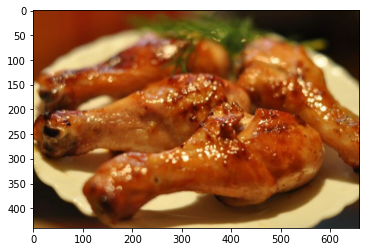

In [190]:
pretty_view_recipe(df_recipes.iloc[row_id])

name
Ароматная свинина «Ананасовое наслаждение» 

cuisine
Домашняя кухня 

difficulty
средняя 

ingredients
куриное филе сливки чеснок яичный белок соль паприка сладкая перец черный молотый смесь пряных трав специи 

steps
Пропустить через мясорубку куриное мясо 
Измельчить чеснок  добавить в фарш вместе со сливками  яичными белками и специями  сладкой паприкой  черным молотым перцем  сухими травами 
Хорошо перемешать  масса должна быть однородной 
Полученный фарш выложить на лист фольги  уплотнить  завернуть  закрутить концы 
Поверх колбаску обернуть пищевой пленкой в несколько слоев 
Выложить изделия в кастрюлю с водой  варить в течение 30 – 40 минут 
Вынуть  остудить  Положить на ночь в холодильник  



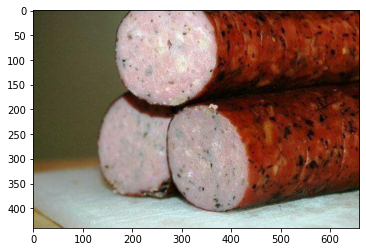

In [191]:
pretty_view_recipe(rs.recommend(row_id))